<a href="https://colab.research.google.com/github/ishanbarway/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Team_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# <b> A. DATA PREPERATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading CSV file
path=('/content/drive/My Drive/Colab Notebooks/CAPSTONE PROJECT/AirBnB Bookings Analysis/Airbnb NYC 2019.csv')


In [ ]:
airbnb_data=pd.read_csv(path)

#  **B. DATA EXPLORATION**

In [ ]:
#How many rows and columns
airbnb_data.shape

(48895, 16)

Here,48895 numbers of rows and 16 numbers of columns present in our datasets

In [ ]:
#Summary of the data
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Information of the data
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#checking the data types
airbnb_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
#checking null values
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 4  columns that have null values ,we need to replace them as it might affect for analysis  later while considering remaining values for the same columns.

In [ ]:
#filling null values of 4 columns with respectives values
airbnb_data["name"].fillna("NoName",inplace=True)
airbnb_data["host_name"].fillna("NoName",inplace=True)
airbnb_data["last_review"].fillna("Notreviewed",inplace=True)
airbnb_data["reviews_per_month"].fillna(0,inplace=True)

In [ ]:
airbnb_data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We have successfully treated the null values and that the data is cleaned so,we can explore some data analysis.

# **C. EXPLORATARY DATA ANALYSIS**

##<B>1. What can we learn about different hosts and areas?

In [ ]:
hosts_areas = airbnb_data.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
top_hosts=hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(10)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
9856,Mike,Manhattan,134
432,Alex,Manhattan,134


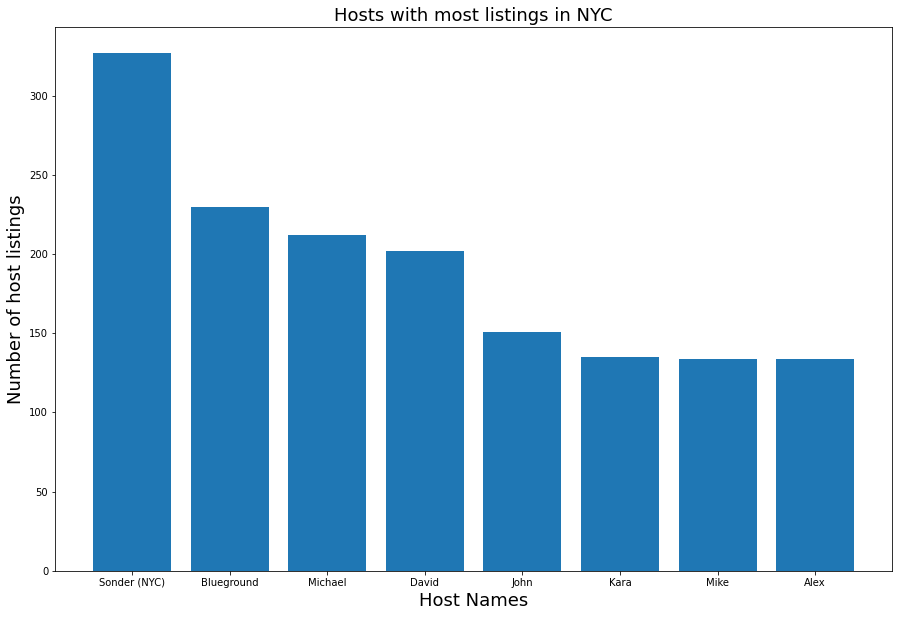

In [ ]:
# Visualizing the hosts with most listings.
plt.rcParams['figure.figsize'] = (15,10)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

**Observations**:From the above result,we can conclude that
* The name of the hosts with the most listings is **Sonder(NYC)** who has *327 listings* in **Manhattan**
* Manhattan & Brooklyn has the highest host count in the area.

##<B>2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

###<B>Average pricing based on apartment category in different neighbourhood

In [ ]:
avg_price= airbnb_data.groupby(['room_type','neighbourhood_group'])['price'].mean().reset_index()
avg_price

,room_type,neighbourhood_group,price
0,Entire home/apt,Bronx,127.506596
1,Entire home/apt,Brooklyn,178.327545
2,Entire home/apt,Manhattan,249.239109
3,Entire home/apt,Queens,147.050573
4,Entire home/apt,Staten Island,173.846591
5,Private room,Bronx,66.788344
6,Private room,Brooklyn,76.500099
7,Private room,Manhattan,116.776622
8,Private room,Queens,71.762456
9,Private room,Staten Island,62.292553


In [ ]:
# Filtering data based on room type
ap = airbnb_data.groupby([ 'room_type','neighbourhood_group',])['price'].mean().unstack().fillna(0)
ap

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,127.506596,178.327545,249.239109,147.050573,173.846591
Private room,66.788344,76.500099,116.776622,71.762456,62.292553
Shared room,59.800000,50.527845,88.977083,69.020202,57.444444


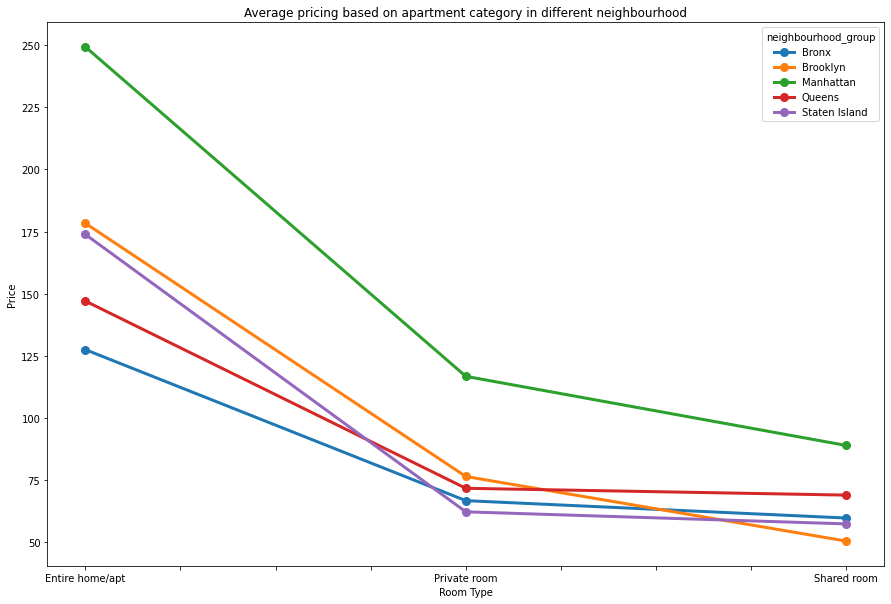

In [ ]:
plt.rcParams['figure.figsize'] = (15,10)
ap_plot= ap.plot(linewidth=3,markersize=8,marker='o',xlabel='Room Type',
                 ylabel='Price',
                 title='Average pricing based on apartment category in different neighbourhood')
ap_plot

###<b> Overall price exploration


In [ ]:
# visualizing the prices
airbnb_data['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

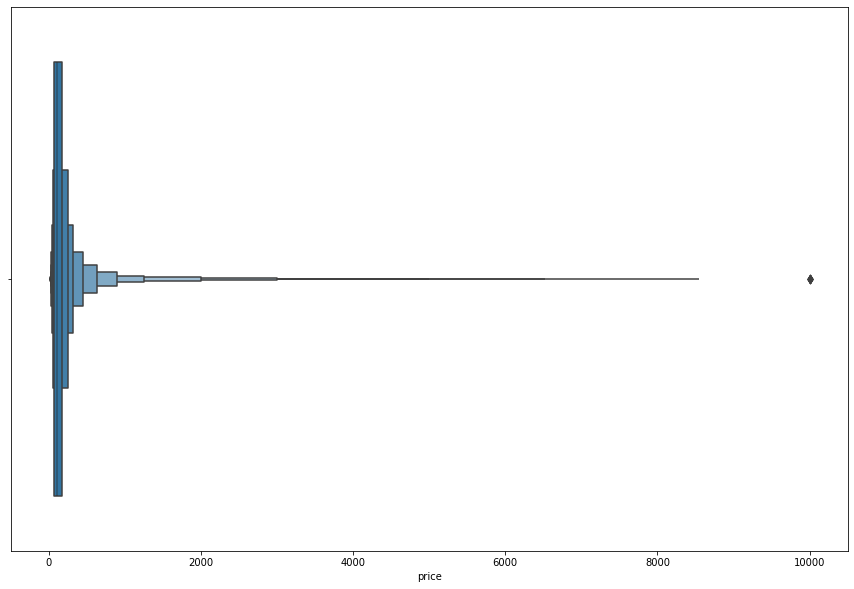

In [ ]:
figsize=(12,8)
sns.boxenplot(x='price',data=airbnb_data)

###<b> Number of reviews given by customers to the neighbourhood hotels

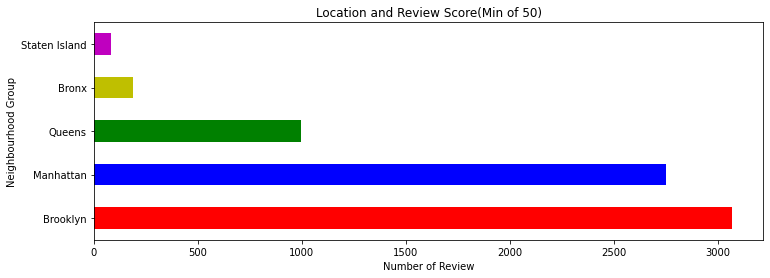

 Count of Review v/s neighbourhood group


,neighbourhood_group
Brooklyn,3065
Manhattan,2751
Queens,997
Bronx,187
Staten Island,81


In [ ]:
#visualizing the count of review vs neighbourhood group
fig = plt.figure(figsize=(12,4))
review_50 = airbnb_data[airbnb_data['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()
df2.plot(kind='barh',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.xlabel('Number of Review')
plt.ylabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

**Observations:** First criteria of our review is we will consider only those who have a review more than 50, so that we can have an insight of the data.

So according to the above plot, Brooklyn got most review in comparison to Manhattan and that is an interesting find. Also Staten Island which is cheaper has less review than the other neighbourhood group. 

##<B> Is there any noticeable difference of traffic among different areas and what could be the reason for it?

###<b> Room type based on neighbourhood groups 

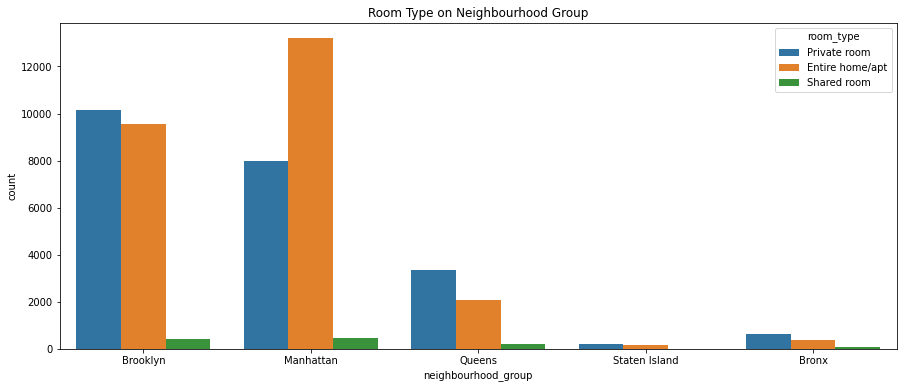

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x=airbnb_data.neighbourhood_group,hue=airbnb_data.room_type)
plt.show()


**Observations**: The graph shows that the home/apt has the highest traiff in Manhattan

###<B> Where is the highest room availablility in neighbourhood group ?

####<B>Checking room availability based on neighbourhood

In [ ]:
#details of rooms_available
room_available = airbnb_data.groupby(['neighbourhood_group', ])['availability_365'].count().reset_index()
room_available = room_available.sort_values(by= 'availability_365', ascending=False)
room_available

,neighbourhood_group,availability_365
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


In [ ]:
#ploting the data in a pie chart for better visualisation 
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

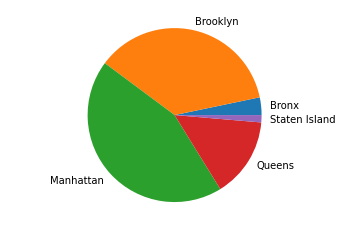

In [ ]:
sums = airbnb_data.groupby(["neighbourhood_group", ])["availability_365"].sum()
axis('equal');
plt.rcParams['figure.figsize'] = (10,10)
pie(sums, labels=sums.index);
show()

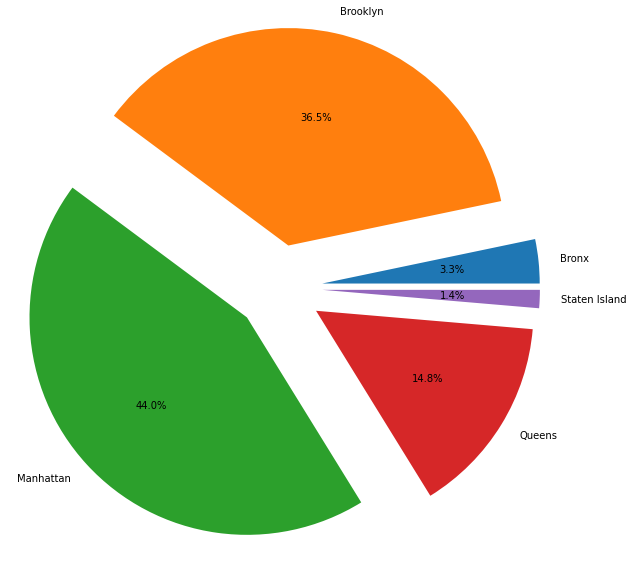

In [ ]:
explode = (0.2,0.2,0.2,0.2,0.2)
fig1, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = (10,10)
ax1.pie(sums, explode=explode,labels=sums.index,autopct='%1.1f%%',)
plt.show()

Observations: This pie chart shows the total number of neighbourhood listed in the data and the room available in percentage.
##### Manhattan has the highest rooms available with 44% in total and Staten Island has the least with only 1.4%.

##<B> Which hosts are the busiest and why?

In [ ]:
df3 = airbnb_data.groupby(['host_name','room_type'])['minimum_nights'].count().reset_index()
df4 = df3.sort_values('minimum_nights',ascending = False)

In [ ]:
df5=df4.head(10)
df5

,host_name,room_type,minimum_nights
12510,Sonder (NYC),Entire home/apt,319
9171,Michael,Entire home/apt,251
1744,Blueground,Entire home/apt,232
3084,David,Entire home/apt,214
3085,David,Private room,184
413,Alex,Entire home/apt,175
6415,John,Private room,153
9172,Michael,Private room,152
9281,Mike,Entire home/apt,141
6414,John,Entire home/apt,135


List of top 10 hosts_name with minimum nights stay. In which, Genevieve is in the first position with 1250 max count, followed by  Peter at second and  Meg at third position repectively.

Text(0, 0.5, 'minimum night stay')

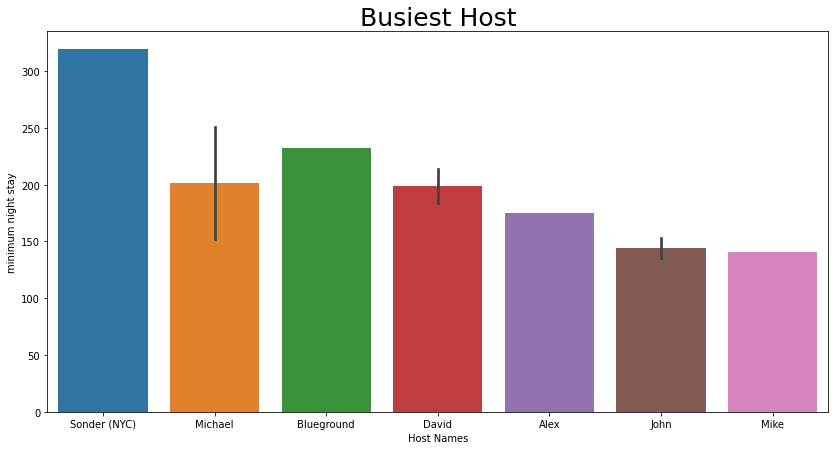

In [ ]:
# Data Visualization(barplot)
plt.rcParams['figure.figsize'] = (14,7)
z = sns.barplot(x = df5['host_name'],y = df5['minimum_nights'])
z.set_title('Busiest Host',{'fontsize':25})
z.set_xlabel('Host Names')
z.set_ylabel('minimum night stay')

Busiest Hosts are:


1.  Sonder(NYC)

2.  Michael

3.  Blueground

Because these hosts listed room type as Entire home and Private room which is preferred by most number of people and they are providing the rooms in the preferred locations .





##<b> How many properties are available for more than 100 days?


In [ ]:
#getting the values where availabilities of room are  more than 100 days
often_available = airbnb_data[airbnb_data['availability_365'] >= 100]

In [ ]:
often_available['availability_365'].count()


19162

In [ ]:
#calculating the percentage 
percent_available_more =often_available['availability_365'].count()/airbnb_data['availability_365'].count()*100

In [ ]:
percent_available_more.round(2)


39.19

Here,39.19% of properties are available for more thn 100 days.most of the properties doesnt work full year

## **Area map Analysis**



Latitude vs Longitude with location



In [ ]:
airbnb_data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

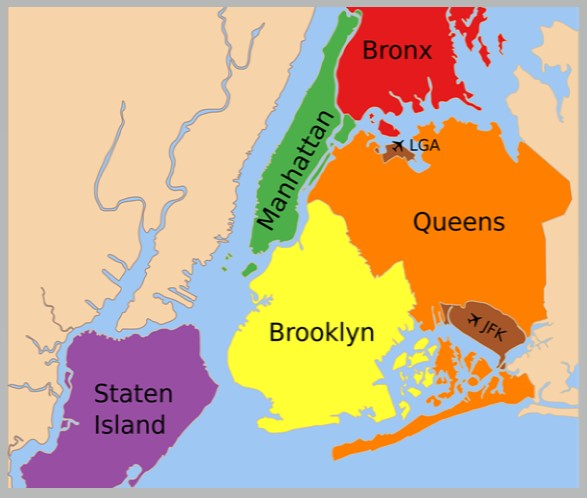

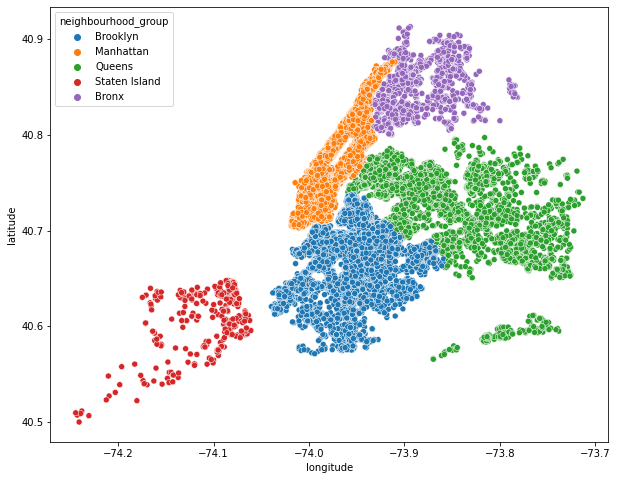

In [ ]:
# visualizing the map with scatterplot using seaborn
plt.figure(figsize=(10,8))
sns.scatterplot(x=airbnb_data.longitude,y=airbnb_data.latitude,hue=airbnb_data.neighbourhood_group)
plt.show()

This shows us the dataset distribution in NewYork city with respect to latitude and longitude(representing  different neighbourhood groups)

#<b> D. CONCLUSION


* With the help of above performed Exploratory Data Analysis and visualization in Airbnb Dataset, suggest us about several insights. EDA help us to detect obvious errors, identify outliners in datasets. 


* We use EDA to ensure the results produce are valid and applicable to any desired business outcomes and goals. Data cleaning concept of missing values if not handled properly then inaccurate interference occurs in the data. It can lead to wrong prediction and classification.


* Pie Chart shows the total number neighbourhood and the room available in percentage in which Manhattan is the highest room available with 44% and Stalen Island is the least shared room available with 1.4% only. 

* Bar plot shows that Entire and Private room is highly preferred by the hosts (Sonder. Michael, Blue ground). Line plot shows that Manhattan has highest average price based on Entire room type and Brooklyn has least average price based on shared room type.
